## 266 - LCL vs. CCL Understanding the Difference


[Youtube](https://www.youtube.com/watch?v=9G74gEcUeC0)

In [1]:
from datetime import datetime
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [2]:
date = datetime(2023, 1, 1)
station = 'OUN'
df = WyomingUpperAir.request_data(date, station)
df = pandas_dataframe_to_unit_arrays(df)

In [3]:
mpcalc.ccl(df['pressure'], df['temperature'], df['dewpoint'])

(649.3496723190677 <Unit('hectopascal')>,
 0.573988004030033 <Unit('degree_Celsius')>,
 33.46835173698645 <Unit('degree_Celsius')>)

In [4]:
ccls = []
lcls = []

In [5]:
for m in range(1, 13):
	date = datetime(2021, m, 1, 12)
	print(date)
	station = 'BMX'
	df = WyomingUpperAir.request_data(date, station)
	df = pandas_dataframe_to_unit_arrays(df)
	lcls.append(mpcalc.lcl(df['pressure'][0], df['temperature'][0], df['dewpoint'][0])[0])
	ccls.append(mpcalc.ccl(df['pressure'], df['temperature'], df['dewpoint'])[0])

2021-01-01 12:00:00
2021-02-01 12:00:00
2021-03-01 12:00:00
2021-04-01 12:00:00
2021-05-01 12:00:00
2021-06-01 12:00:00
2021-07-01 12:00:00
2021-08-01 12:00:00
2021-09-01 12:00:00
2021-10-01 12:00:00
2021-11-01 12:00:00
2021-12-01 12:00:00


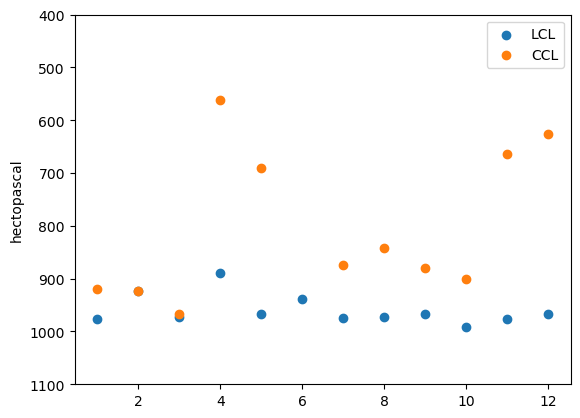

In [6]:
m = range(1, 13)
fig, ax = plt.subplots()
ax.scatter(m, lcls, label = 'LCL')
ax.scatter(m, ccls, label = 'CCL')
ax.set_ylim(1100, 400)
plt.legend()